In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.metrics import r2_score
import os
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import plotly
import chart_studio.plotly as py
import plotly.express as px
import cufflinks as cf
cf.go_offline()

In [2]:
path_dataset =r'C:\Users\patri\Google trends for buildings\Dataset'
path_submissions =r'D:\Temp\20200809\Google trends for buildings\Top50 submissions in GEPIII'

In [3]:
test_df = pd.read_pickle(os.path.join(path_dataset, 'test_df.pickle'))
test_df

,row_id,building_id,meter,timestamp,bldgID_meter
0,0,0,0,2017-01-01 00:00:00,0_0
1,1,1,0,2017-01-01 00:00:00,1_0
2,2,2,0,2017-01-01 00:00:00,2_0
3,3,3,0,2017-01-01 00:00:00,3_0
4,4,4,0,2017-01-01 00:00:00,4_0
...,...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00,1444_0
41697596,41697596,1445,0,2018-05-09 07:00:00,1445_0
41697597,41697597,1446,0,2018-05-09 07:00:00,1446_0
41697598,41697598,1447,0,2018-05-09 07:00:00,1447_0


In [4]:
df_clustering_output = pd.read_pickle(os.path.join(path_dataset, 'df_clustering_output.pickle'))
df_clustering_output['bldgID_meter'] = df_clustering_output['building_id'].astype('str') + '_' + df_clustering_output['meter'].astype('str')
df_clustering_output

,merged_id,ClusterNo,site_id,building_id,meter,bldgID_meter
0,site0_bldg0_meter0,1,0,0,0,0_0
1,site0_bldg1_meter0,1,0,1,0,1_0
2,site0_bldg2_meter0,3,0,2,0,2_0
3,site0_bldg3_meter0,1,0,3,0,3_0
4,site0_bldg4_meter0,1,0,4,0,4_0
...,...,...,...,...,...,...
2375,site15_bldg1444_meter0,4,15,1444,0,1444_0
2376,site15_bldg1445_meter0,0,15,1445,0,1445_0
2377,site15_bldg1446_meter0,3,15,1446,0,1446_0
2378,site15_bldg1447_meter0,4,15,1447,0,1447_0


In [5]:
df_daily_merged = pd.read_pickle(os.path.join(path_dataset, 'df_daily_merged.pickle'))
df_daily_merged_pivot = df_daily_merged.pivot_table(columns='keyword', index=['geo_id', 'date'], values='trend').reset_index()
df_daily_merged_pivot

keyword,geo_id,date,Adobe,Google Docs,Microsoft Office
0,CA,2016-01-03,76.00,13.53,23.20
1,CA,2016-01-04,83.00,24.19,42.34
2,CA,2016-01-05,82.00,32.39,42.34
3,CA,2016-01-06,88.00,30.34,48.14
4,CA,2016-01-07,83.00,31.98,58.00
...,...,...,...,...,...
11636,US,2020-07-18,42.12,11.60,26.13
11637,US,2020-07-19,38.71,13.44,23.76
11638,US,2020-07-20,74.26,19.95,52.80
11639,US,2020-07-21,79.00,20.16,57.42


In [6]:
df_solution = pd.read_csv(os.path.join(path_dataset, 'solution.csv'))
df_solution = df_solution.rename(columns={'meter_reading':'meter_reading_groundTruth'})
df_solution

,row_id,meter_reading_groundTruth,Usage
0,0,173.3700,Public
1,1,53.5127,Public
2,2,6.1430,Public
3,3,101.7010,Public
4,4,1141.2400,Public
...,...,...,...
41697595,41697595,-9999.0000,Ignored
41697596,41697596,-9999.0000,Ignored
41697597,41697597,-9999.0000,Ignored
41697598,41697598,-9999.0000,Ignored


In [7]:
# Get the list of paths of hourly data (.csv)
list_sub = []

for file in os.listdir(path_submissions):
    list_sub.append(os.path.join(path_submissions, file))
        
list_sub

['D:\\Temp\\20200809\\Google trends for buildings\\Top50 submissions in GEPIII\\13577404.pickle.gz',
 'D:\\Temp\\20200809\\Google trends for buildings\\Top50 submissions in GEPIII\\13768618.pickle.gz',
 'D:\\Temp\\20200809\\Google trends for buildings\\Top50 submissions in GEPIII\\13768660.pickle.gz',
 'D:\\Temp\\20200809\\Google trends for buildings\\Top50 submissions in GEPIII\\13806350.pickle.gz',
 'D:\\Temp\\20200809\\Google trends for buildings\\Top50 submissions in GEPIII\\13808838.pickle.gz',
 'D:\\Temp\\20200809\\Google trends for buildings\\Top50 submissions in GEPIII\\13810582.pickle.gz',
 'D:\\Temp\\20200809\\Google trends for buildings\\Top50 submissions in GEPIII\\13812777.pickle.gz',
 'D:\\Temp\\20200809\\Google trends for buildings\\Top50 submissions in GEPIII\\13819396.pickle.gz',
 'D:\\Temp\\20200809\\Google trends for buildings\\Top50 submissions in GEPIII\\13821697.pickle.gz',
 'D:\\Temp\\20200809\\Google trends for buildings\\Top50 submissions in GEPIII\\13821715.pi

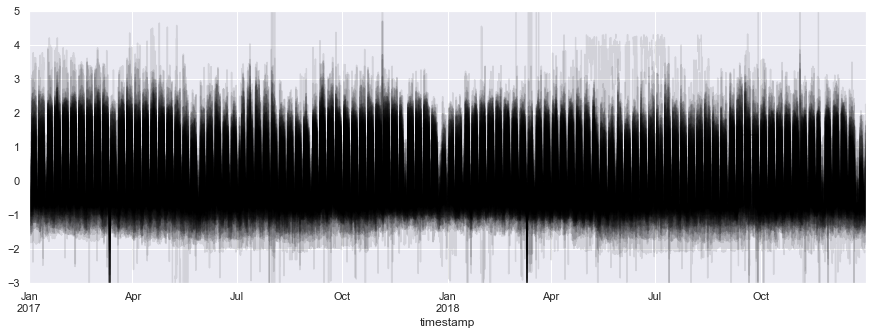

In [8]:
site_id = 13
meter = 0
ClusterNo = 7

path_temp = list_sub[1]

df_submission_temp = pd.read_pickle(path_temp)

list_Cluster = df_clustering_output[(df_clustering_output['site_id']==site_id)&(df_clustering_output['meter']==meter)&(df_clustering_output['ClusterNo']==ClusterNo)]['bldgID_meter'].to_list()
idx_Cluster = test_df[test_df['bldgID_meter'].isin(list_Cluster)].index

df_submission_temp = df_submission_temp.loc[idx_Cluster]
df_submission_temp = df_submission_temp.merge(test_df, on='row_id')
df_submission_temp = df_submission_temp.merge(df_solution, on='row_id')

df_plot = df_submission_temp.pivot_table(columns='bldgID_meter', values='meter_reading_groundTruth', index='timestamp')
df_plot = df_plot[df_plot>0]
df_plot = (df_plot - df_plot.mean())/df_plot.std()
df_plot.plot(figsize=(15,5),alpha=0.1,legend=False, ylim=(-3, 5),color='black')

bldgID_meter = df_submission_temp['bldgID_meter'].unique()[3]
df_temp = df_submission_temp[df_submission_temp['bldgID_meter']==bldgID_meter].copy()
df_temp = df_temp.set_index('timestamp')[['meter_reading', 'meter_reading_groundTruth']].sort_index()
df_temp = df_temp[df_temp>0]
df_temp.iplot()

In [9]:
df_daily_merged_pivot[df_daily_merged_pivot['geo_id']=='US'].set_index('date').drop('geo_id',axis=1).loc['2017':'2018'].iplot()